In [66]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson 
# distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the 
# probability of cars waiting at the drive-up window.

In [33]:
import seaborn as sb
from scipy.stats import poisson

In [39]:
data_poisson = poisson.rvs(mu=2, size=1000)

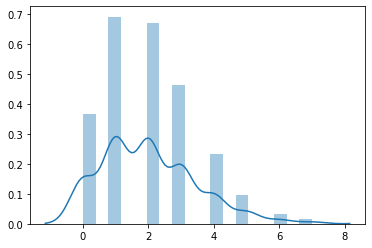

In [40]:
sb.distplot(data_poisson)

In [29]:
# What is the probability that no cars drive up in the noon hour?
stats.poisson(2).pmf(0)

0.1353352832366127

In [30]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(2).sf(3)

0.14287653950145296

In [31]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(1)

0.5939941502901616

In [ ]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?

In [71]:
n = 100_000
y = np.round(np.random.normal(3,.03),3)
y

3.066

In [72]:
grade_in_top_five_percent = pd.DataFrame(y)

ValueError: DataFrame constructor not properly called!

3.0222095199754286

Text(0.5, 1.0, 'Outcome of 100,000 Grads Sim')

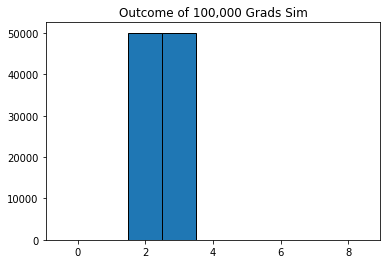

In [69]:
plt.hist(x, bins=range(0, 10), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Grade Sims')

In [3]:
stats.norm(3,.3).isf(.05)

3.4934560880854417

In [72]:
stats.norm(3,.3).ppf(.95)

3.4934560880854417

In [4]:
stats.norm(3,.3).ppf(.3)

2.842679846187588

In [ ]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs.  How likely is it that this many people or more click through?

In [ ]:
μ click_throughs = .02
visitors = 4326
click_throughs = 97

In [9]:
#stats.poisson(.02).sf(97/4326) - not certain why this is wrong

0.0198013266932447

In [10]:
stats.binom(4326,.02).sf(97)

0.11781530585907925

In [ ]:
#  You are working on some statistics homework consisting of 100 questions where all of the answers are a probability 
# rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each 
# question.

# What is the probability that at least one of your first 60 answers is correct?

In [22]:
response = np.around(np.random.random(60),2)

In [23]:
response

array([0.82, 0.34, 0.76, 0.84, 0.38, 0.48, 0.25, 0.47, 0.16, 0.06, 0.86,
       0.53, 0.34, 0.8 , 0.77, 0.43, 0.33, 0.35, 0.24, 0.8 , 0.31, 0.72,
       0.35, 0.32, 0.34, 0.3 , 0.04, 0.05, 0.03, 0.7 , 0.38, 0.15, 0.77,
       0.05, 0.12, 0.33, 0.05, 0.69, 0.37, 0.35, 0.32, 0.79, 0.17, 0.29,
       0.03, 0.89, 0.47, 0.43, 0.27, 0.28, 0.86, 0.91, 0.27, 0.05, 0.6 ,
       0.11, 0.96, 0.94, 0.7 , 0.74])

In [24]:
stats.binom(60,.01).sf(1)

0.12123327131180733

In [ ]:
# The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% 
# chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 
# 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up 
# each day? How likely is it that it goes two days without getting cleaned up? All week?

In [70]:
chance_student_cleans = .03
daily_students_in_kitchen = 59.4
daily_chance_student_cleans = .1782     

In [79]:
stats.binom(.03,59.4).sf(1)

nan

In [ ]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After 
# several weeks of careful observation, you notice that the average number of people in line when your lunch 
# break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes 
# for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that 
# you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have 
# one hour for lunch, and ignore travel time to and from La Panaderia.

In [49]:
ncol = 10_000
avg_people_in_line = 15
time_to_order = 2
sd_line = 3
order_to_food = 10
#prob 15+ minutes to eat

In [44]:
x = np.round(np.random.normal(avg_people_in_line, sd_line, ncol),0).astype('int64')

In [45]:
people_in_line = pd.DataFrame(x)


In [46]:
time_order_eat = people_in_line * time_to_order + order_to_food
time_order_eat

,0
0,32
1,46
2,40
3,42
4,38
5,40
6,34
7,36
8,46
9,42


In [47]:
time_order_eat.apply(lambda row : True if row.sum() <= 45 else False, axis = 1).mean()

0.7934

In [56]:
time_order_eat2 = (np.round((np.random.normal(avg_people_in_line, sd_line)*time_to_order) + order_to_food),0).isf(15)

AttributeError: 'tuple' object has no attribute 'isf'

In [ ]:
# Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. Model the distribution of employees salaries with a normal distribution and answer the following 
# questions:
    
# What percent of employees earn less than 60,000?
# What percent of employees earn more than 95,000?
# What percent of employees earn between 65,000 and 80,000?
# What do the top 5% of employees make?